In [92]:
import numpy as np
# We have mnist saved on our disk
mnist = np.load('mnist.npz')
# open things
train_images = mnist['x_train']
train_labels = mnist['y_train']
train_images = train_images / 255.0
train_images.shape
train_images = np.expand_dims(train_images, axis=-1)

In [93]:
import keras # import the framework
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

from keras.utils import to_categorical


In [94]:
model = Sequential()
model.add(Conv2D(
    10,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(28,28,1),
    padding='SAME'
))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10))


In [95]:
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])


In [96]:
model.fit(train_images, to_categorical(train_labels),
          batch_size=128,
          epochs=10,
          verbose=1)


Epoch 1/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.9708 - acc: 0.7615
Epoch 2/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.3970 - acc: 0.8865
Epoch 3/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.3505 - acc: 0.8985
Epoch 4/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.3296 - acc: 0.9044
Epoch 5/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.3162 - acc: 0.9082
Epoch 6/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.3063 - acc: 0.9118
Epoch 7/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.2988 - acc: 0.9141
Epoch 8/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.2923 - acc: 0.9155
Epoch 9/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.2866 - acc: 0.9170
Epoch 10/10
60000/60000 [==============================] - 13s 214us/step - loss: 

In [97]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                19610     
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 19,710
Trainable params: 19,710
Non-trainable params: 0
_________________________________________________________________


In [68]:
from keras.models import Model

In [69]:
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[3].output)


In [70]:
representations = intermediate_layer_model.predict(train_images)

In [71]:
representations.shape

(60000, 10)

In [72]:
representations[1]

array([ 13.30284977, -13.47199154,  -0.04375554,   0.6983155 ,
        -6.56423473,   4.15861702,  -0.6849041 ,  -0.74036312,
        -0.09396911,  -1.44635117], dtype=float32)

In [73]:
from sklearn.manifold import TSNE

In [74]:
tsne = TSNE(n_components=2, random_state=0)

In [89]:
transformed = tsne.fit_transform(representations[0:1000])

In [90]:
transformed

array([[  9.79216003,   7.53144169],
       [-13.34454823, -47.03754425],
       [-15.70994473,  15.9427557 ],
       ..., 
       [-11.99953747, -40.04784775],
       [ 10.03240299,   8.94348049],
       [-10.64162827, -12.64870358]], dtype=float32)

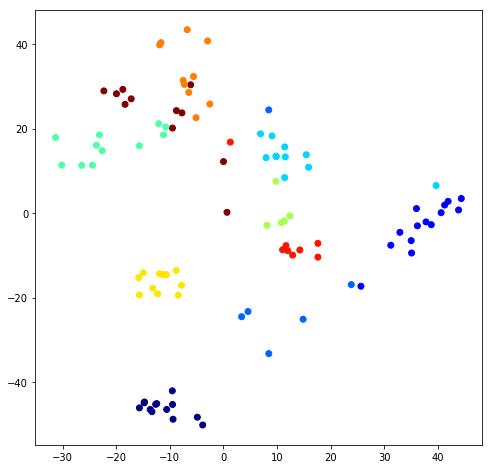

In [91]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(8, 8))

plt.scatter(x = transformed[0:100,0], y=transformed[0:100,1], c=train_labels[0:100], cmap=plt.cm.get_cmap("jet", 10))
plt.show()